In [30]:
import networkx as nx
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
def idplot(base,hops,_type,method):
    G = nx.Graph()
    g = {}
    for file in os.listdir(base):
        filename = os.fsdecode(file)
        if _type in filename and method in filename:
            with open(base + filename, "r") as csvfile:
                d = list(csv.reader(csvfile))
                for r in range(len(d)-(30-hops)):
                    ip1 = d[r][2]
                    ip2 = d[r + 1][2]
                    effe = ["*", "ip"]
                    if ip1 not in effe and ip2 not in effe:
                        if ip1 not in g:
                            g[ip1] = []
                        if ip2 not in g[ip1]:
                            g[ip1].append(ip2)

    for k, v in g.items():
        G.add_node(k)
        for i in v:
            G.add_edge(k, i)

    return G

def draw(G):
    _,degree = map(list, zip(*G.degree())) 
    nx.draw_kamada_kawai(
            G,
            node_color=range(len(G.degree())),
            cmap=plt.cm.GnBu,
            # node_size=[(v * 500) + 1 for v in  degree],
            # with_labels=True,
        )

In [14]:
def cloud_draw(provider,hops):
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 2, 1)   # Define 3 rows, 2 column, Activate subplot 1. 
    base = f"/home/rc/idp-castellotti-data/new-traceroutes/{provider}/"
    plt.subplot(321).set_title(f"{provider} STARLINK 7 HOPS ICMP")
    G=idplot(base=base,hops=8,_type="starlink",method="ICMP")
    draw(G)

    plt.subplot(322).set_title(f"{provider} NORMAL 7 HOPS ICMP ")
    G=idplot(base=base,hops=hops,_type="normal",method="ICMP")
    draw(G)

    plt.subplot(323).set_title(f"{provider} STARLINK 7 HOPS UDP")
    G=idplot(base=base,hops=hops,_type="starlink",method="UDP")
    draw(G)

    plt.subplot(324).set_title(f"{provider} NORMAL 7 HOPS UDP")
    G=idplot(base=base,hops=hops,_type="normal",method="UDP")
    draw(G)

    plt.subplot(325).set_title(f"{provider} STARLINK 7 HOPS TCP")
    G=idplot(base=base,hops=hops,_type="starlink",method="TCP")
    draw(G)

    plt.subplot(326).set_title(f"{provider} NORMAL 7 HOPS TCP")
    G=idplot(base=base,hops=hops,_type="normal",method="TCP")
    draw(G)

    plt.show()

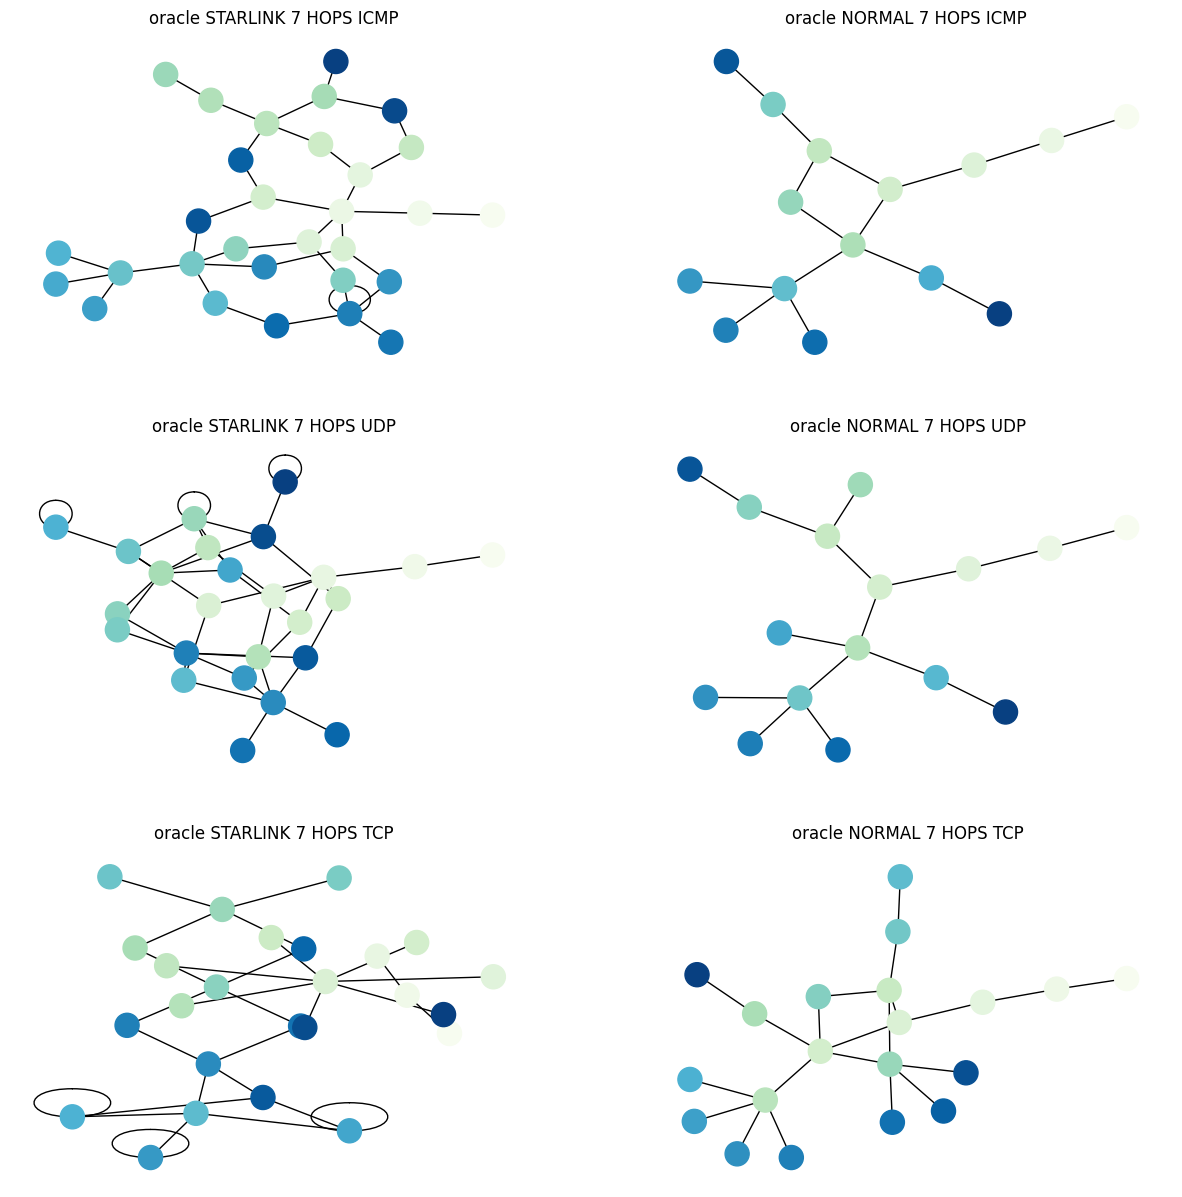

In [15]:
cloud_draw(provider="oracle",hops=7)

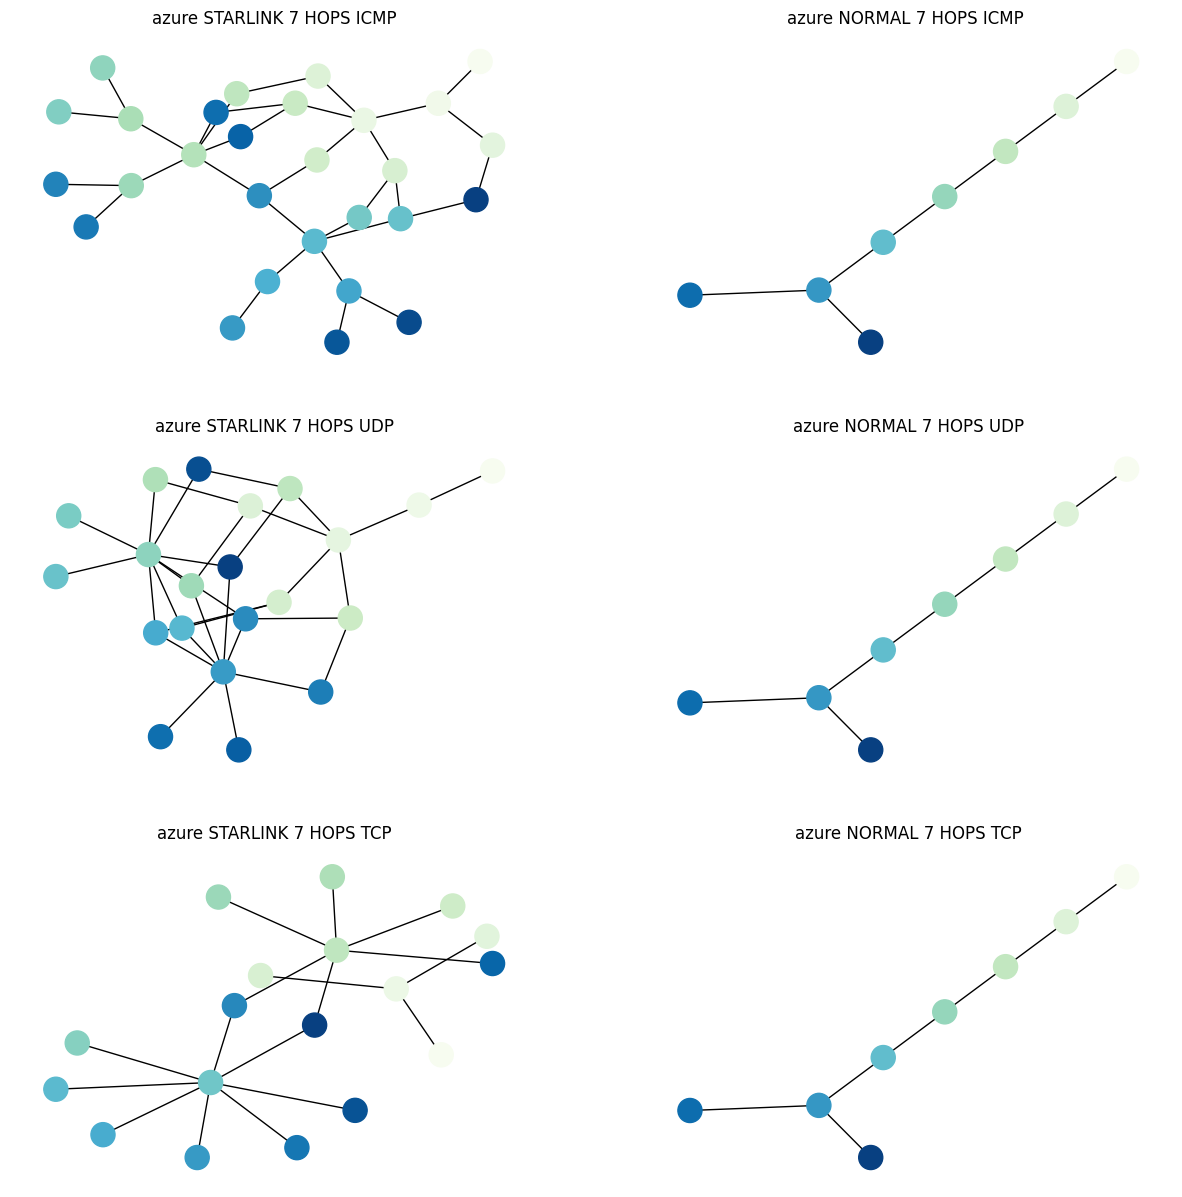

In [16]:
cloud_draw(provider="azure",hops=7)

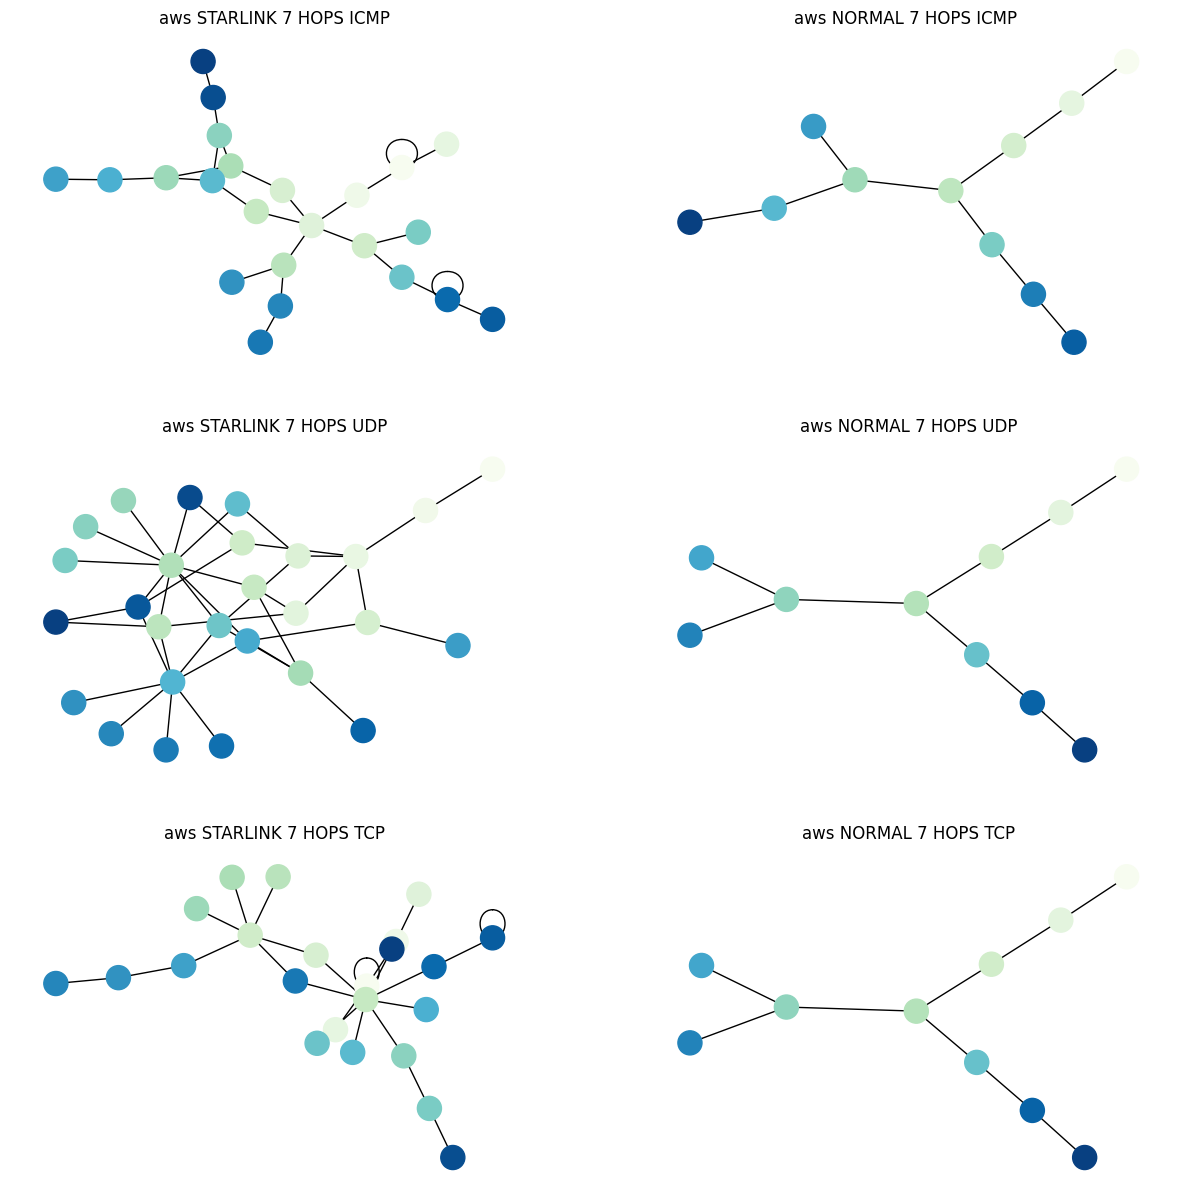

In [17]:
cloud_draw(provider="aws",hops=7)

In [18]:
def hostplot(base,hops,_type,method,host):
    G = nx.Graph()
    g = {}
    for file in os.listdir(base):
        filename = os.fsdecode(file)
        if _type in filename and method in filename and host in filename:
            with open(base + filename, "r") as csvfile:
                d = list(csv.reader(csvfile))
                for r in range(len(d)-(30-hops)):
                    ip1 = d[r][2]
                    ip2 = d[r + 1][2]
                    effe = ["*", "ip"]
                    if ip1 not in effe and ip2 not in effe:
                        if ip1 not in g:
                            g[ip1] = []
                        if ip2 not in g[ip1]:
                            g[ip1].append(ip2)

    for k, v in g.items():
        G.add_node(k)
        for i in v:
            G.add_edge(k, i)

    return G

In [19]:
# traceroutes to a single host (all 3 different protocols) (starlink vs normal)
def host_draw(provider,hops,host):
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 2, 1)
    
    base = f"/home/rc/idp-castellotti-data/new-traceroutes/{provider}/"
    plt.subplot(321).set_title(f"{host} STARLINK 7 HOPS ICMP")
    G=hostplot(base=base,hops=8,_type="starlink",host=host,method="ICMP")
    draw(G)

    plt.subplot(322).set_title(f"{host} NORMAL 7 HOPS ICMP ")
    G=hostplot(base=base,hops=hops,_type="normal",host=host,method="ICMP")
    draw(G)

    plt.subplot(323).set_title(f"{host} STARLINK 7 HOPS UDP")
    G=hostplot(base=base,hops=hops,_type="starlink",host=host,method="UDP")
    draw(G)

    plt.subplot(324).set_title(f"{host} NORMAL 7 HOPS UDP")
    G=hostplot(base=base,hops=hops,_type="normal",host=host,method="UDP")
    draw(G)

    plt.subplot(325).set_title(f"{host} STARLINK 7 HOPS TCP")
    G=hostplot(base=base,hops=hops,_type="starlink",host=host,method="TCP")
    draw(G)

    plt.subplot(326).set_title(f"{host} NORMAL 7 HOPS TCP")
    G=hostplot(base=base,hops=hops,_type="normal",host=host,method="TCP")
    draw(G)
    plt.show()

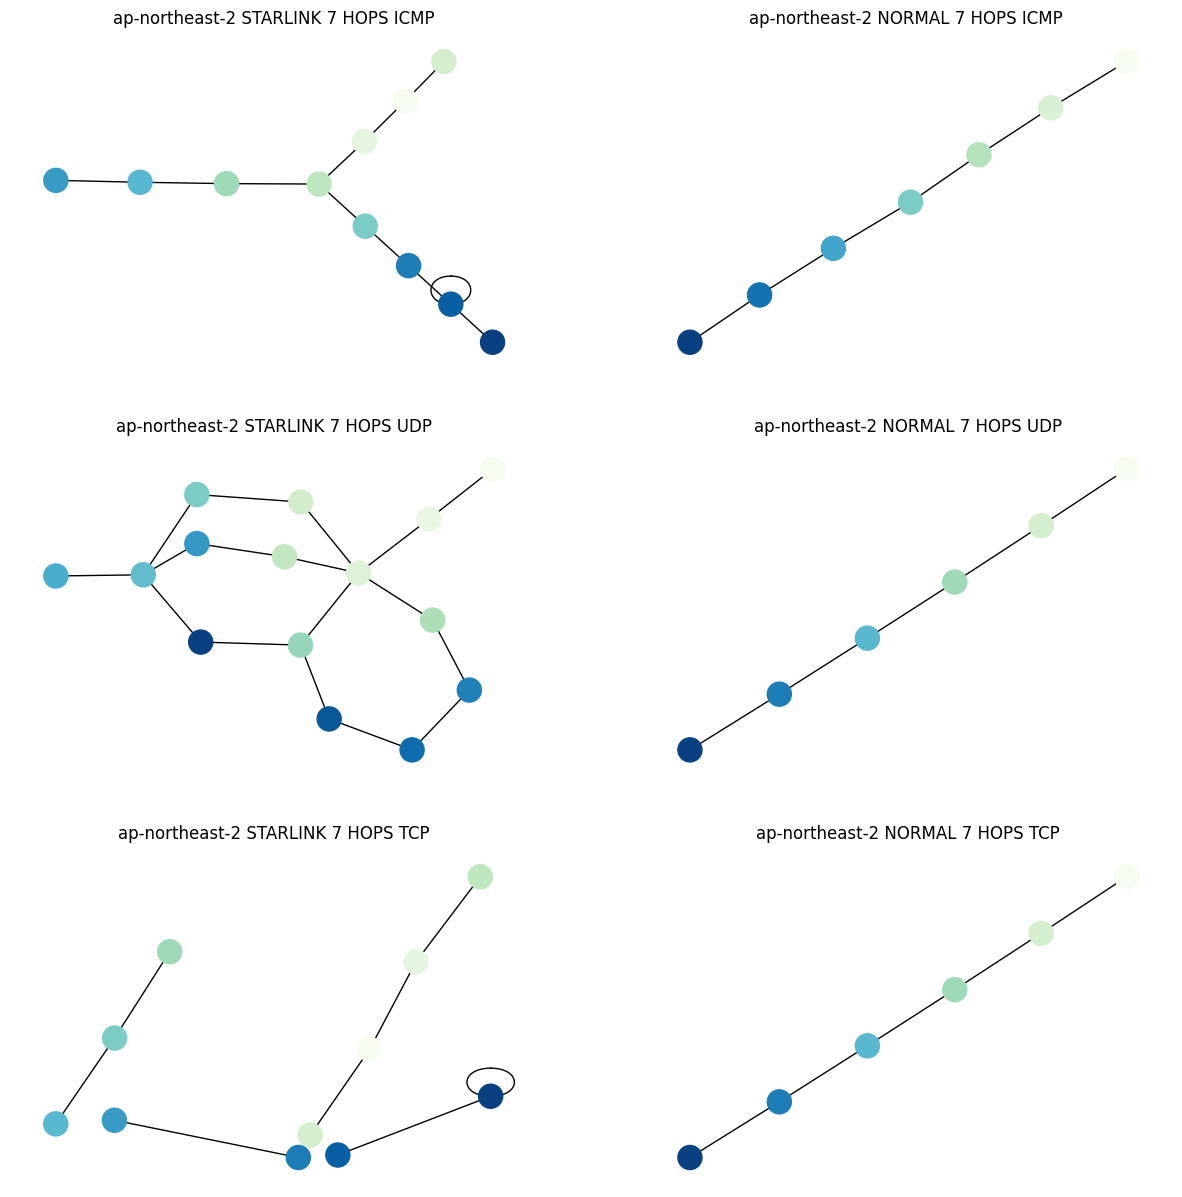

In [20]:

host_draw(provider="aws", host="ap-northeast-2",hops=7)

In [6]:
def cloud_draw(provider,hops):
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 2, 1)   # Define 3 rows, 2 column, Activate subplot 1. 
    base = f"/home/rc/idp-castellotti-data/traceroutes-iperf-5bks/{provider}/"
    plt.subplot(321).set_title(f"{provider} STARLINK 7 HOPS ICMP")
    G=idplot(base=base,hops=8,_type="starlink",method="ICMP")
    draw(G)

    plt.subplot(322).set_title(f"{provider} NORMAL 7 HOPS ICMP ")
    G=idplot(base=base,hops=hops,_type="normal",method="ICMP")
    draw(G)
    plt.show()

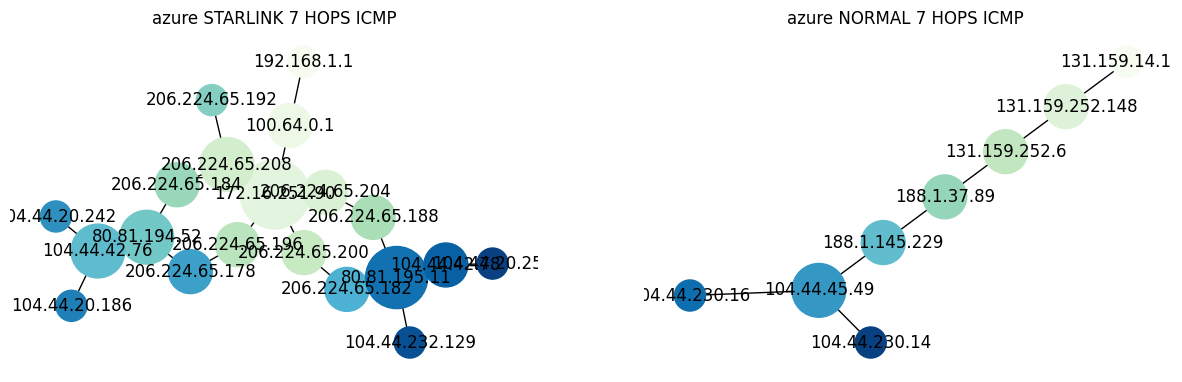

In [7]:
cloud_draw(provider="azure",hops=7)

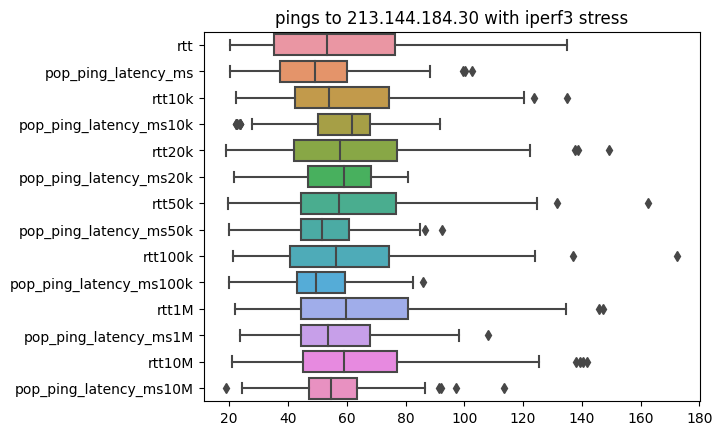

In [36]:
df0 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-normal.csv")
df1 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-10k.csv")
df2 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-20k.csv")
df3 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-50k.csv")
df4 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-100k.csv")
df5 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-1M.csv")
df6 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-10M.csv")
df = pd.concat([df0, df1, df2, df3, df4, df5, df6], axis=1).reindex(df1.index)
sns.boxplot(
    data=df[
        [
            "rtt",
            "pop_ping_latency_ms",
            "rtt10k",
            "pop_ping_latency_ms10k",
            "rtt20k",
            "pop_ping_latency_ms20k",
            "rtt50k",
            "pop_ping_latency_ms50k",
            "rtt100k",
            "pop_ping_latency_ms100k",
            "rtt1M",
            "pop_ping_latency_ms1M",
            "rtt10M",
            "pop_ping_latency_ms10M",
        ]
    ],
    orient="h",
).set_title("pings to 213.144.184.30 with iperf3 stress")
plt.show()

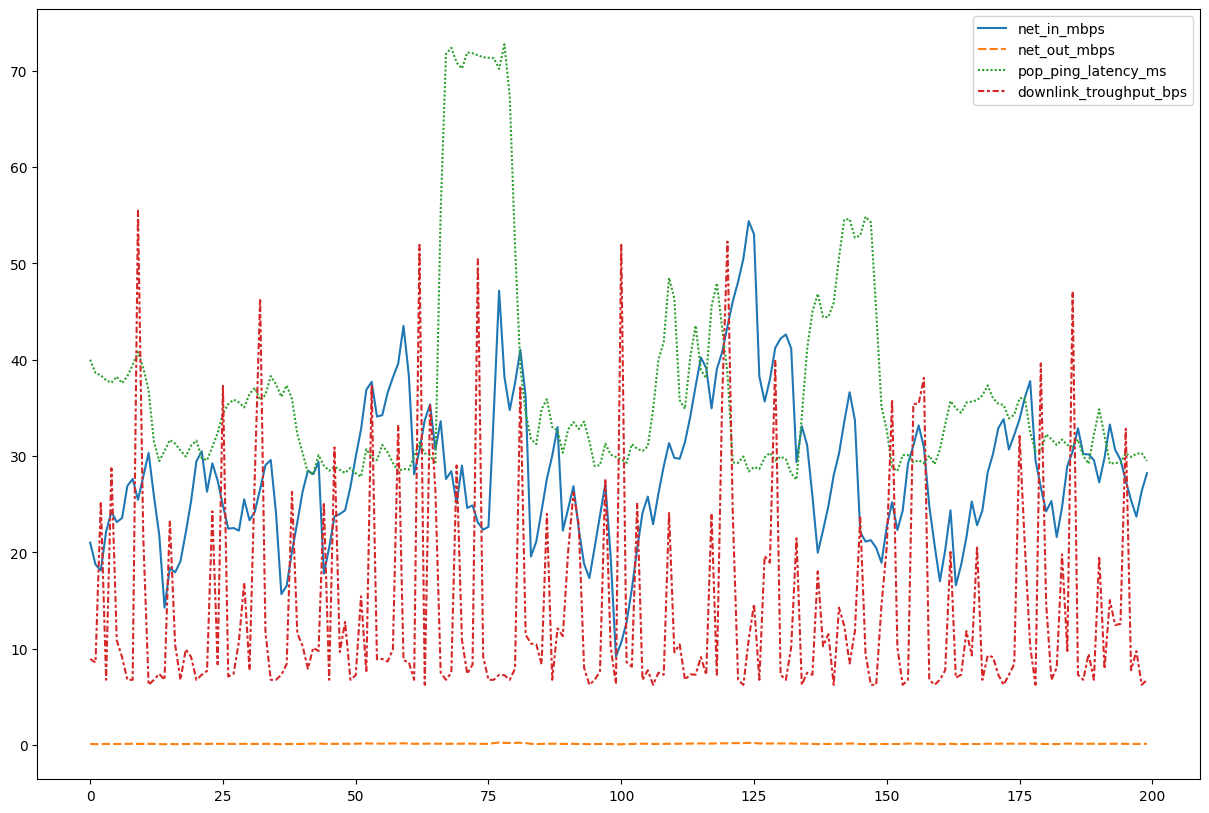

In [33]:
plt.figure(figsize=(15, 10))
df = pd.read_csv('/home/rc/idp-castellotti-data/large_file_download.csv').head(200)
df['timestamp'] = pd.to_datetime(df['timestamp'], format ='%Y-%m-%d %H:%M:%S.%f')
sns.lineplot(data=df,dashes=True)
plt.show()

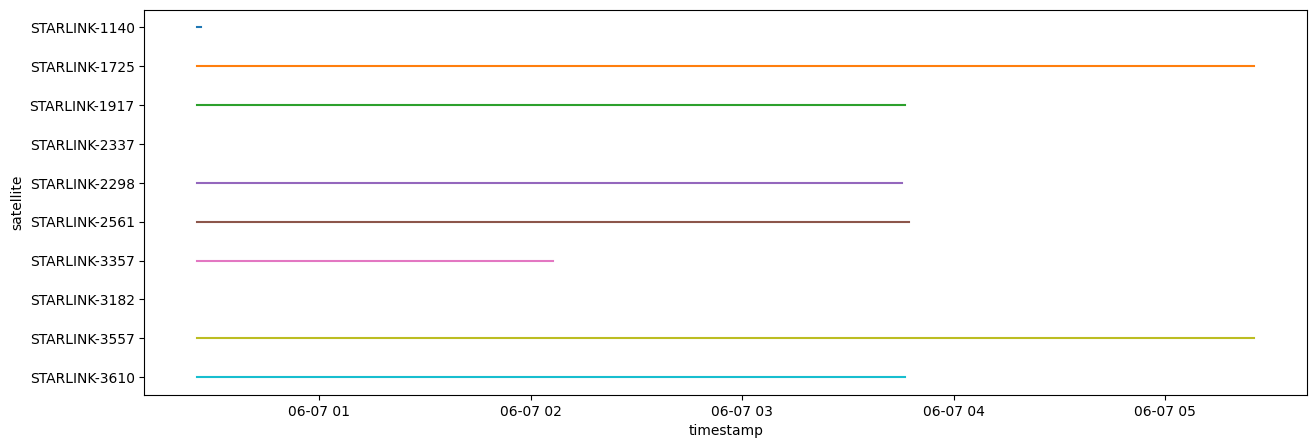

In [29]:
plt.figure(figsize=(15, 5))
df = pd.read_csv('/home/rc/idp-castellotti-data/visible_satellites.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format ='%Y-%m-%d %H:%M:%S.%f')

unique_satellites=df['satellite'].unique()[:10]
count=0
for sat in unique_satellites:
    daf=df.loc[df['satellite'] == sat][["timestamp","satellite","pop_ping_latency_ms"]]
    sns.lineplot(data=daf, x="timestamp", y="satellite",dashes=True)
    count+=1

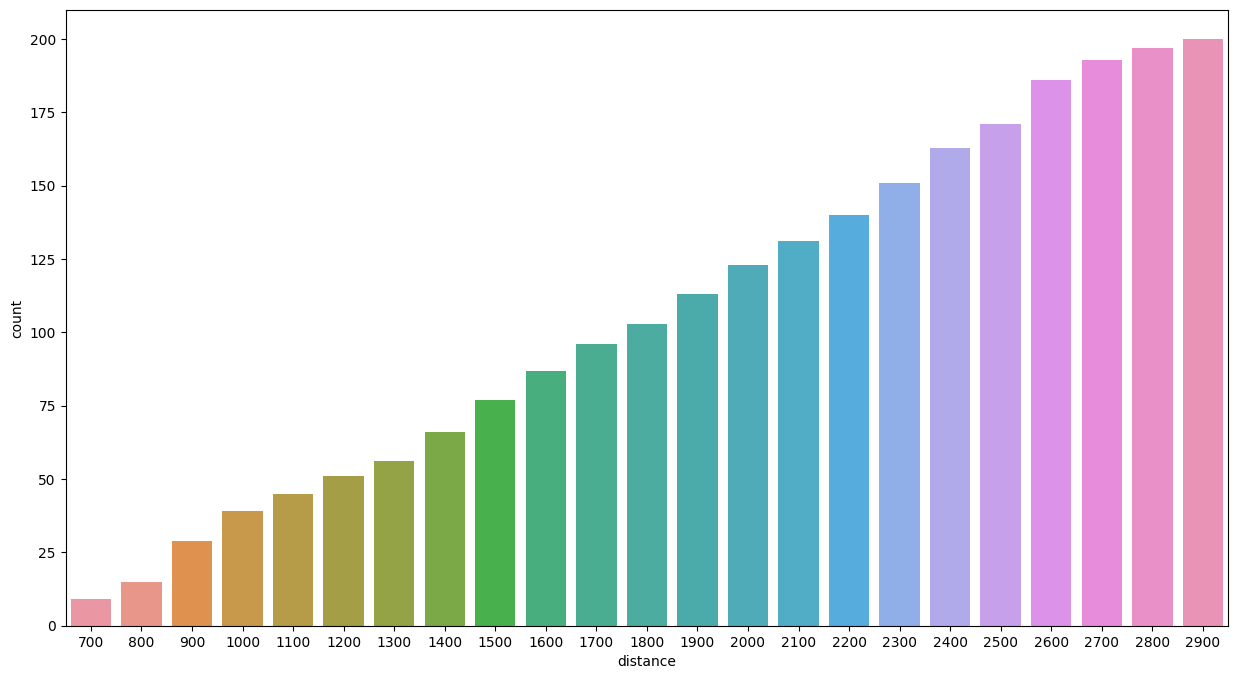

In [31]:
df = pd.read_csv('/home/rc/idp-castellotti-data/visible_satellites_variable_distance.csv')
plt.figure(figsize=(15, 8))
sns.countplot(x=df["distance"])
plt.show()